In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
import os
import re
from glob import glob
from collections import Counter

from pprint import pprint
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn.metrics import classification_report

from src.load_data import load_data

In [6]:
def plot_figures(sets, title=None, bins=50):
    plt.figure(figsize=(5*len(sets), 3))
    if title:
        plt.suptitle(title, fontsize=16, y=1.08)
    if len(sets) > 1:
        plt.subplot(131)
        plt.hist(sets[0], bins=bins)
        plt.title('Training Set')
        plt.subplot(132)
        plt.hist(sets[1], bins=bins)
        plt.title('Validation Set')
        plt.subplot(133)
        plt.hist(sets[2], bins=bins)
        plt.title('Test Set')
    else:
        plt.hist(sets[0], bins=bins)
        plt.title('Total Set')
    plt.show()

### Load Data


In [7]:
train_data, valid_data, test_data, metadata = load_data()

#### Metadata

In [8]:
print('Total number of articles:', metadata['article_nums']['train'] + 
                                   metadata['article_nums']['valid'] +
                                   metadata['article_nums']['test'])
print('Article Distribution:', metadata['article_nums'])

Total number of articles: 315
Article Distribution: {'train': 251, 'valid': 32, 'test': 32}


In [9]:
print('Total number of sentences:', metadata['sentence_nums']['train'] + 
                                   metadata['sentence_nums']['valid'] +
                                   metadata['sentence_nums']['test'])
print('Sentence Distribution:', metadata['sentence_nums'])

Total number of sentences: 4422
Sentence Distribution: {'train': 3582, 'valid': 399, 'test': 441}


#### Years

In [38]:
urls = [art['url'] for art in (train_data + valid_data + test_data)]
years = []
for url in urls:
    for sub in url.split('/'):
        if re.match('^[1-3][0-9]{3}$', sub):
            years.append(sub)

In [39]:
sorted([int(y) for y in set(years)])

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

In [40]:
Counter(years)

Counter({'2014': 49,
         '2009': 54,
         '2016': 34,
         '2013': 45,
         '2011': 36,
         '2010': 30,
         '2015': 32,
         '2012': 35})

#### Label Sentence Distribution in articles

In [41]:
def get_sent_label_ratios(data_, label): 
    return [(len([sent['label'] 
                 for sent in article['sentences'] 
                 if sent['label'] == label])*100/len(article['sentences']))
            for ai, article in enumerate(data_)]

In [42]:
len([d for d in get_sent_label_ratios(train_data+valid_data+test_data, label=1) if d == 50])

18

In [43]:
for d in sorted(get_sent_label_ratios(train_data+valid_data+test_data, label=0), reverse=True):
    print(d)

98.21428571428571
97.61904761904762
96.42857142857143
96.29629629629629
96.29629629629629
96.15384615384616
95.91836734693878
95.83333333333333
95.45454545454545
95.23809523809524
94.73684210526316
94.44444444444444
94.44444444444444
94.44444444444444
94.11764705882354
94.11764705882354
93.75
93.75
93.75
93.33333333333333
93.33333333333333
93.10344827586206
92.85714285714286
92.85714285714286
92.85714285714286
92.85714285714286
92.85714285714286
92.85714285714286
92.3076923076923
92.3076923076923
91.66666666666667
91.66666666666667
91.66666666666667
91.66666666666667
91.66666666666667
91.30434782608695
91.11111111111111
90.9090909090909
90.9090909090909
90.9090909090909
90.9090909090909
90.0
90.0
90.0
90.0
90.0
90.0
90.0
88.88888888888889
88.88888888888889
87.5
87.5
87.5
87.5
87.5
87.5
87.5
87.5
86.66666666666667
86.66666666666667
86.36363636363636
85.71428571428571
85.71428571428571
85.71428571428571
85.71428571428571
85.71428571428571
85.71428571428571
85.71428571428571
85.7142857142

In [44]:
for d in sorted(get_sent_label_ratios(train_data+valid_data+test_data, label=1)):
    print(d)

1.7857142857142858
2.380952380952381
3.5714285714285716
3.7037037037037037
3.7037037037037037
3.8461538461538463
4.081632653061225
4.166666666666667
4.545454545454546
4.761904761904762
5.2631578947368425
5.555555555555555
5.555555555555555
5.555555555555555
5.882352941176471
5.882352941176471
6.25
6.25
6.25
6.666666666666667
6.666666666666667
6.896551724137931
7.142857142857143
7.142857142857143
7.142857142857143
7.142857142857143
7.142857142857143
7.142857142857143
7.6923076923076925
7.6923076923076925
8.333333333333334
8.333333333333334
8.333333333333334
8.333333333333334
8.333333333333334
8.695652173913043
8.88888888888889
9.090909090909092
9.090909090909092
9.090909090909092
9.090909090909092
10.0
10.0
10.0
10.0
10.0
10.0
10.0
11.11111111111111
11.11111111111111
12.5
12.5
12.5
12.5
12.5
12.5
12.5
12.5
13.333333333333334
13.333333333333334
13.636363636363637
14.285714285714286
14.285714285714286
14.285714285714286
14.285714285714286
14.285714285714286
14.285714285714286
14.285714285

In [45]:
for d in sorted(get_sent_label_ratios(test_data, label=0), reverse=True):
    print(d)

96.15384615384616
93.75
92.85714285714286
92.85714285714286
90.0
90.0
88.88888888888889
87.5
85.71428571428571
84.61538461538461
83.33333333333333
82.6086956521739
80.0
78.57142857142857
76.92307692307692
75.0
70.58823529411765
70.0
66.66666666666667
66.66666666666667
60.0
56.25
55.55555555555556
52.17391304347826
50.0
45.45454545454545
40.0
37.5
37.5
25.0
25.0
0.0


In [46]:
for d in sorted(get_sent_label_ratios(test_data, label=1)):
    print(d)

3.8461538461538463
6.25
7.142857142857143
7.142857142857143
10.0
10.0
11.11111111111111
12.5
14.285714285714286
15.384615384615385
16.666666666666668
17.391304347826086
20.0
21.428571428571427
23.076923076923077
25.0
29.41176470588235
30.0
33.333333333333336
33.333333333333336
40.0
43.75
44.44444444444444
47.82608695652174
50.0
54.54545454545455
60.0
62.5
62.5
75.0
75.0
100.0


#### Lower-bound Performances

In [5]:
y_true = [sentence['label'] for article in test_data
          for sentence in article['sentences']]

In [31]:
y_preds_0 = [0]*len(y_true) # if all preds are 0
y_preds_1 = [1]*len(y_true) # if all preds are 1

In [7]:
print("When classifiers predict as all '0'\n")
print(classification_report(y_true, y_preds_0))

When classifiers predict as all '0'

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       325
           1       0.00      0.00      0.00       116

   micro avg       0.74      0.74      0.74       441
   macro avg       0.37      0.50      0.42       441
weighted avg       0.54      0.74      0.63       441



/home/aorus/workspaces/simge/Master_Thesis/.env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [8]:
print("When classifiers predict as all '1'\n")
print(classification_report(y_true, y_preds_1))

When classifiers predict as all '1'

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       325
           1       0.26      1.00      0.42       116

   micro avg       0.26      0.26      0.26       441
   macro avg       0.13      0.50      0.21       441
weighted avg       0.07      0.26      0.11       441



In [18]:
print("When classifiers predict all '0's as '1' and vice versa\n")
print(classification_report(y_true, y_preds_reversed))

When classifiers predict all '0's as '1' and vice versa

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       325
           1       0.00      0.00      0.00       116

   micro avg       0.00      0.00      0.00       441
   macro avg       0.00      0.00      0.00       441
weighted avg       0.00      0.00      0.00       441



#### Number of Sentences

In [54]:
def get_num_sents(data_):
    return [len(article['sentences']) for article in data_]

In [79]:
print('Max number of sentences in an article:',
      max(get_num_sents(train_data + valid_data + test_data)))

Max number of sentences in an article: 58


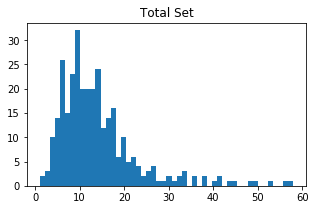

In [109]:
plot_figures([
    get_num_sents(train_data+valid_data+test_data)
], '')    

In [197]:
320/(320+116)

0.7339449541284404

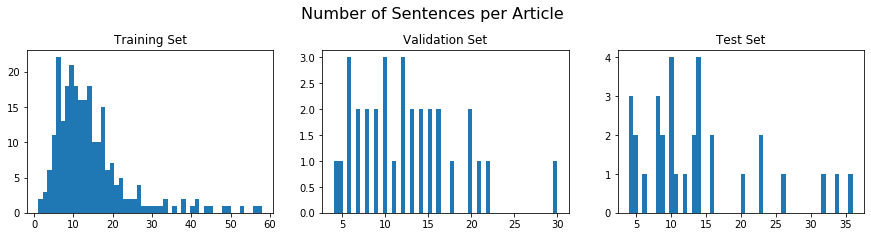

In [108]:
plot_figures([
    get_num_sents(train_data),
    get_num_sents(valid_data),
    get_num_sents(test_data)
], 'Number of Sentences per Article')

#### Sentence Lengths based on Chars

In [7]:
def get_sent_lengths_chars(data_):
    return [len(sent['sentence']) for article in data_ for sent in article['sentences']]

In [85]:
print("Char-based length of the longest sentence:", 
      max(get_sent_lengths_chars(train_data + valid_data + test_data)))

Char-based length of the longest sentence: 639


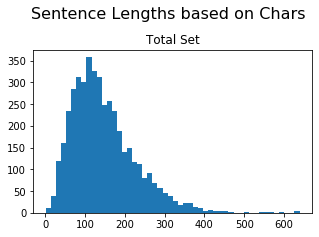

In [8]:
plot_figures([
    get_sent_lengths_chars(train_data+valid_data+test_data)
], 'Sentence Lengths based on Chars')

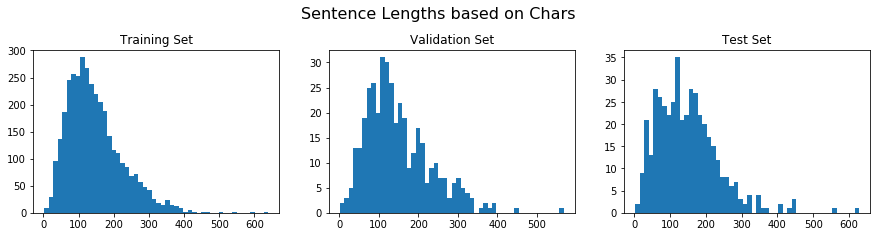

In [86]:
plot_figures([
    get_sent_lengths_chars(train_data),
    get_sent_lengths_chars(valid_data),
    get_sent_lengths_chars(test_data)
], 'Sentence Lengths based on Chars')

#### Sentence Lengths based on Tokens

In [21]:
for i in get_sent_lengths_token(train_data):
    print(i)


70
34
32
18
21
29
22
37
16
40
29
36
24
23
22
23
18
17
15
14
42
39
23
7
23
25
47
27
19
27
37
14
19
48
15
29
14
17
7
35
40
33
26
22
29
6
14
11
30
14
37
16
23
35
11
17
3
23
5
12
31
21
12
28
46
28
16
31
37
14
21
18
7
21
9
9
16
25
18
27
23
10
16
17
33
8
30
28
15
34
19
38
12
30
26
21
23
27
8
9
6
14
38
28
34
48
34
69
47
29
77
54
99
45
63
46
42
45
31
63
63
18
15
26
36
26
9
24
33
32
20
35
22
24
16
14
42
16
7
26
29
9
14
21
7
16
18
23
64
17
29
24
24
20
37
27
27
12
42
32
28
15
17
15
22
18
26
7
12
19
40
18
29
22
55
13
43
38
20
20
15
18
15
15
12
10
21
46
9
23
26
5
12
40
20
20
25
7
4
23
66
65
20
14
11
7
10
6
11
15
47
31
21
9
41
22
22
26
16
25
20
15
30
22
22
24
54
31
51
18
27
17
27
55
29
20
19
27
12
23
19
16
10
21
16
36
24
34
19
22
64
12
23
13
11
11
16
19
17
12
18
25
23
55
22
15
29
13
24
45
23
21
17
27
16
17
11
52
36
12
10
24
8
17
10
19
15
18
15
24
27
18
14
43
22
38
7
28
14
26
19
22
16
20
27
8
15
10
39
32
19
33
12
25
23
18
24
52
27
32
14
10
24
25
37
22
14
15
20
40
33
30
10
10
20
16
22
39
29
26
9
11
18

In [63]:
import statistics 

In [68]:
listA = get_sent_lengths_token(train_data + valid_data + test_data)
print(statistics.median(listA))


listA = get_sent_lengths_token(train_data)
print(statistics.median(listA))


listA = get_sent_lengths_token(valid_data)
print(statistics.median(listA))

listA = get_sent_lengths_token(test_data)
print(statistics.median(listA))

22.0
22.0
22
23


In [67]:
sum(get_sent_lengths_token(valid_data))/\
    len(get_sent_lengths_token(valid_data)) 

24.604010025062657

In [60]:
def get_sent_lengths_token(data_):
    return [len(sent['sentence'].split()) for article in data_ for sent in article['sentences']]

In [10]:
print("Token-based length of the longest sentence:", 
      max(get_sent_lengths_token(train_data + valid_data + test_data)))

Token-based length of the longest sentence: 105


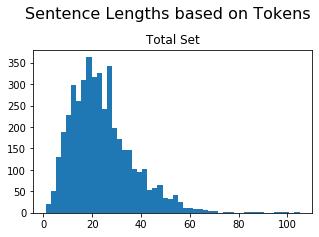

In [11]:
plot_figures([
    get_sent_lengths_token(train_data+valid_data+test_data),
], 'Sentence Lengths based on Tokens')

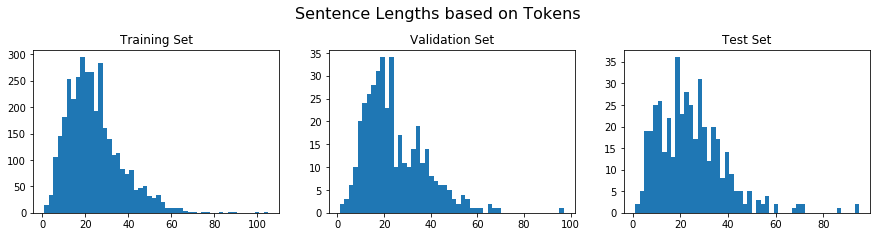

In [89]:
plot_figures([
    get_sent_lengths_token(train_data),
    get_sent_lengths_token(valid_data),
    get_sent_lengths_token(test_data)
], 'Sentence Lengths based on Tokens')

# Result Analysis

In [11]:
def read_results(file_path):

    validation = {
        '0': {}, 
        '1': {},
        'micro': {},
        'macro': {},
        'weighted': {},
    }
    test = {
        '0': {}, 
        '1': {},
        'micro': {},
        'macro': {},
        'weighted': {},
    }

    with open(file_path, 'r') as f:
        for i, line in enumerate(f.readlines()):
            line = line.strip().split()

            if line:

                if i == 5:
                    validation['0'] = {
                        'precision': float(line[1]),
                        'recall': float(line[2]),
                        'f1': float(line[3]),
                        'support': int(line[4])
                    }

                elif i == 6:
                    validation['1'] = {
                        'precision': float(line[1]),
                        'recall': float(line[2]),
                        'f1': float(line[3]),
                        'support': int(line[4])
                    }

                elif i == 8:
                    validation['micro'] = {
                        'precision': float(line[2]),
                        'recall': float(line[3]),
                        'f1': float(line[4]),
                        'support': int(line[5])
                    }

                elif i == 9:
                    validation['macro'] = {
                        'precision': float(line[2]),
                        'recall': float(line[3]),
                        'f1': float(line[4]),
                        'support': int(line[5])
                    }

                elif i == 10:
                    validation['weighted'] = {
                        'precision': float(line[2]),
                        'recall': float(line[3]),
                        'f1': float(line[4]),
                        'support': int(line[5])
                    }

                elif i == 20:
                    test['0'] = {
                        'precision': float(line[1]),
                        'recall': float(line[2]),
                        'f1': float(line[3]),
                        'support': int(line[4])
                    }

                elif i == 21:
                    test['1'] = {
                        'precision': float(line[1]),
                        'recall': float(line[2]),
                        'f1': float(line[3]),
                        'support': int(line[4])
                    }

                elif i == 23:
                    test['micro'] = {
                        'precision': float(line[2]),
                        'recall': float(line[3]),
                        'f1': float(line[4]),
                        'support': int(line[5])
                    }

                elif i == 24:
                    test['macro'] = {
                        'precision': float(line[2]),
                        'recall': float(line[3]),
                        'f1': float(line[4]),
                        'support': int(line[5])
                    }

                elif i == 25:
                    test['weighted'] = {
                        'precision': float(line[2]),
                        'recall': float(line[3]),
                        'f1': float(line[4]),
                        'support': int(line[5])
                    }

                elif i == 12:
                    validation['macro']['f1'] = float(line[1])
                    
                elif i == 13:
                    validation['1']['f1'] = float(line[1])

                elif i == 27:
                    test['macro']['f1'] = float(line[1])
                                                     
                elif i == 28:
                    test['1']['f1'] = float(line[1])
                    
    return validation, test

#### Read Model Performances File

In [65]:
model_folder = '/media/aorus/OrtakAlan/Master_Thesis_Models/Optimized_RQ2_bert_many_to_one_model/'

In [66]:
runs = []
with open('{}/model_performances.csv'.format(model_folder), 'r') as f:
    for line in f.readlines():
        line = line.strip()
        if line:        
            model_name, val_f1_macro, test_f1_macro = line.split(',')
            specs = model_name.split('_')
            
            if len(specs) > 3:
            
                metadata = {
                    'research_question': specs[1],
                    'transformer': '_'.join([specs[i] for i in range(2, specs.index('model'))]),
                    'model_no': specs[specs.index('model')+1],
                    'optimizer': specs[specs.index('lr')-1],
                    'learning_rate': specs[specs.index('lr')+1],
                    'lrreduction': True if 'lrreduction' in specs else False,
                    'loss': '_'.join([specs[specs.index('loss')+i] for i in range(1,3)]),
                }

                if 'ww' in specs:
                    metadata['window_width'] = specs[specs.index('ww')+1]
                    
                if 'epochs' in specs:
                    metadata['epochs'] = specs[specs.index('epochs')+1]
                    
                runs.append({
                    'model_name': model_name,
                    'metadata': metadata,
                    'val_f1_macro': val_f1_macro,
                    'test_f1_macro': test_f1_macro
                })

In [67]:
runs[0]

{'model_name': 'Optimized_RQ2_bert_many_to_one_model_0_ww_1_adam_lr_0.0001_epochs_1_loss_binary_crossentropy',
 'metadata': {'research_question': 'RQ2',
  'transformer': 'bert_many_to_one',
  'model_no': '0',
  'optimizer': 'adam',
  'learning_rate': '0.0001',
  'lrreduction': False,
  'loss': 'binary_crossentropy',
  'window_width': '1',
  'epochs': '1'},
 'val_f1_macro': '0.7333240914026941',
 'test_f1_macro': '0.6436164827376734'}

In [73]:
runs2 = [r for r in runs
#          if r['metadata']['epochs'] == '2'
#         and r['metadata']['model_no'] == '2'
#          if r['metadata']['optimizer'] == 'adam'
#          if r['metadata']['learning_rate'] != '0.001']
        if r['metadata']['model_no'] == '2']

for run in runs2:
#     print(run['metadata']['learning_rate'])
#     print(run['metadata']['optimizer'])
#     print(run['metadata']['model_no'], end='  ')
    print(run['model_name'])
    print(run['val_f1_macro'], run['test_f1_macro'])
    print(run)
    print()

Optimized_RQ2_bert_many_to_one_model_2_ww_1_adam_lr_0.0001_epochs_1_loss_binary_crossentropy
0.7201399790685505 0.6528630036116274
{'model_name': 'Optimized_RQ2_bert_many_to_one_model_2_ww_1_adam_lr_0.0001_epochs_1_loss_binary_crossentropy', 'metadata': {'research_question': 'RQ2', 'transformer': 'bert_many_to_one', 'model_no': '2', 'optimizer': 'adam', 'learning_rate': '0.0001', 'lrreduction': False, 'loss': 'binary_crossentropy', 'window_width': '1', 'epochs': '1'}, 'val_f1_macro': '0.7201399790685505', 'test_f1_macro': '0.6528630036116274'}

Optimized_RQ2_bert_many_to_one_model_2_ww_1_adam_lr_2e-05_epochs_1_loss_binary_crossentropy
0.7149326494304661 0.6637300434194724
{'model_name': 'Optimized_RQ2_bert_many_to_one_model_2_ww_1_adam_lr_2e-05_epochs_1_loss_binary_crossentropy', 'metadata': {'research_question': 'RQ2', 'transformer': 'bert_many_to_one', 'model_no': '2', 'optimizer': 'adam', 'learning_rate': '2e-05', 'lrreduction': False, 'loss': 'binary_crossentropy', 'window_width': 

#### Read Model Results Files

In [76]:
model_folder = '/home/aorus/workspaces/simge/Master_Thesis/Model/Optimized_RQ2_elmo_many_to_one_model/'

results = []
for folder_path in glob(model_folder + 'Optimized*'):
    
    results_file = os.path.join(folder_path, 'model_results_file.txt')
    
    if os.path.isfile(results_file):
    
        model_name = os.path.basename(folder_path)
        specs = model_name.split('_')

        if 'adamax' in model_name:
            continue

        metadata = {
            'research_question': specs[1],
            'transformer': '_'.join([specs[i] for i in range(2, specs.index('model'))]),
            'model_no': specs[specs.index('model')+1],
            'optimizer': specs[specs.index('lr')-1],
            'learning_rate': specs[specs.index('lr')+1],
            'lrreduction': True if 'lrreduction' in specs else False,
            'loss': '_'.join([specs[specs.index('loss')+i] for i in range(1,3)]),
        }

        if 'ww' in specs:
            metadata['window_width'] = specs[specs.index('ww')+1]

        if 'epochs' in specs:
            metadata['epochs'] = specs[specs.index('epochs')+1]

        if 'tunedlayers' in specs:
            metadata['tunedlayers'] = specs[specs.index('tunedlayers')+1]

        validation, test = read_results(results_file)

        results.append({
            'model_name': model_name,
            'metadata': metadata,
            'validation': validation,
            'test': test
        })

In [77]:
print(results[0]['metadata']['research_question'], results[0]['metadata']['transformer'])
print(max([r['validation']['macro']['f1'] for r in results]))
print(max([r['test']['macro']['f1'] for r in results]))
print(max([r['test']['1']['f1'] for r in results]))

RQ2 elmo_many_to_one
0.8508760574748528
0.7651812240047533
0.6545454545454545


In [14]:
print(results[0]['metadata']['research_question'], results[0]['metadata']['transformer'], 2)
print(max([r['validation']['macro']['f1'] for r in results]))
print(max([r['test']['macro']['f1'] for r in results]))
print(max([r['test']['1']['f1'] for r in results]))

RQ1 elmo 2
0.8662768031189083
0.8037732490878348
0.7058823529411764


In [51]:
print(results[0]['metadata']['research_question'], results[0]['metadata']['transformer'])
print(max([r['validation']['macro']['f1'] for r in results]))
print(max([r['test']['macro']['f1'] for r in results]))
print(max([r['test']['1']['f1'] for r in results]))

RQ1 bert
0.8792233625461254
0.8329510940308684
0.7488584474885844


In [64]:
res2 = [r for r in results
#          if r['metadata']['epochs'] == '2'
#         and r['metadata']['model_no'] == '8'
#          if r['metadata']['optimizer'] == 'adam'
#           if r['metadata']['window_width'] == '1'
#         if r['metadata']['learning_rate'] == '0.01']
        if r['metadata']['model_no'] == '9']
#        and r['metadata']['optimizer'] == 'adam']

for run in res2:
    print(run['model_name'])
    print(run['test']['macro']['f1'])
    print(run['test']['1']['f1'])
    print(run['validation']['macro']['f1'])
    print()

In [66]:
res2 = [r for r in results
#          if r['metadata']['epochs'] == '2'
#         and r['metadata']['model_no'] == '8'
#          if r['metadata']['optimizer'] == 'adam'
          if r['metadata']['window_width'] == '1'
        and r['metadata']['learning_rate'] == '0.001']

for run in res2:
#     print(run['model_name'])
    print(run['test']['macro']['f1'])
    print(run['test']['1']['f1'])
    print(run['validation']['macro']['f1'])

0.7402677434787193
0.60
0.8246860273463796
0.7319941852781816
0.59
0.8034753989937562
0.6383752173225857
0.41
0.7732717028239819
0.7319941852781816
0.59
0.8250322094082896
0.7524096618357488
0.63
0.8405315614617941
0.6894970677092589
0.51
0.8138031356069177
0.7378405455191804
0.60
0.8143290226025557
0.7243964709304205
0.58
0.8086160171946547
0.7422749531108113
0.60
0.7939393939393941
0.7359375
0.59
0.8153846153846155
0.7208803005904455
0.57
0.8069320931401817
0.7580066574023204
0.63
0.8091961930971219
0.7275297433984165
0.58
0.8239449206213525
0.759481961147086
0.63
0.8392059553349875
0.7655258917017949
0.64
0.8359375
0.7572404972221112
0.63
0.8209379658296068
0.7470140358558953
0.61
0.8306288738770109
0.7045454545454546
0.53
0.7827986047827042
0.7402273011115275
0.61
0.8062869404811204
0.7605632692322855
0.64
0.8216360687444318
0.7271683882603706
0.58
0.8128003342851174
0.7291666666666666
0.58
0.8171928044640417
0.7505895519405252
0.62
0.8076552590412046
0.7354264782836211
0.59
0.8076

for res in results:
    print(res['model_name'])
    print(res['test']['1']['f1'], res['test']['macro']['f1'])